# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [560]:
import scipy as sp
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

%matplotlib inline
import statistics as st
from scipy import stats
import matplotlib.mlab as mlab
from sklearn import metrics 

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [507]:
mu = 1
var = 4
n_obs = 500
n_distr = stats.norm.rvs(mu, var, size =  n_obs)
sp.stats.describe(n_distr)

DescribeResult(nobs=500, minmax=(-13.54355578105411, 11.0342207887794), mean=0.60388196639986313, variance=15.810676628808135, skewness=-0.07563991320079205, kurtosis=-0.16664552213446582)

In [502]:
k = 3
chi_distr = stats.chi2.rvs(k, size = n_obs)
stats.describe(chi_distr)

DescribeResult(nobs=500, minmax=(0.008071763792269579, 15.147449487947485), mean=3.0942521896070549, variance=6.3659258270297014, skewness=1.4975601040580764, kurtosis=2.719113855720913)

In [511]:
lamb = 10
poiss_distr = stats.poisson.rvs(lamb, size = n_obs)
stats.describe(poiss_distr)

DescribeResult(nobs=500, minmax=(3, 22), mean=9.7959999999999994, variance=9.4252344689378766, skewness=0.5059823913361345, kurtosis=0.31763839537872096)

**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

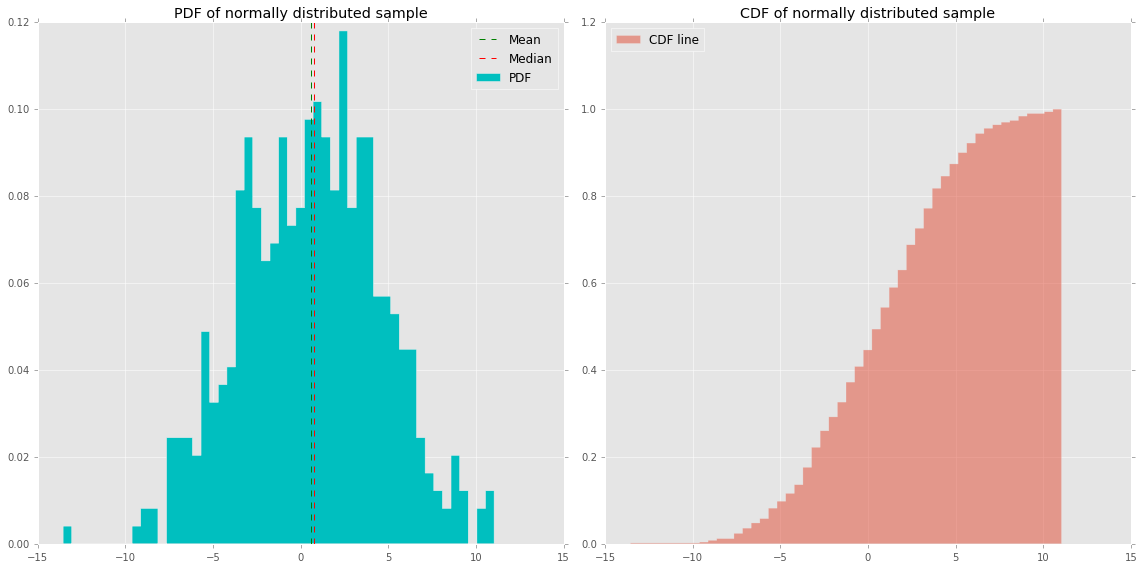

In [508]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 8))
ax0.hist(n_distr, 50, normed=1, histtype='stepfilled', facecolor='c', label = 'PDF')
ax0.set_title('PDF of normally distributed sample')
ax1.hist(n_distr, bins=50, normed=1, histtype='stepfilled', cumulative=1, alpha = 0.5, label = 'CDF line')
ax1.set_title('CDF of normally distributed sample')
n_mean = st.mean(n_distr)
n_median = st.median(n_distr)
ax0.axvline(n_mean, color='g', linestyle='dashed', linewidth=1, label ='Mean') 
ax0.axvline(n_median, color='r', linestyle='dashed', linewidth=1, label = 'Median') 
ax0.legend()
ax1.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

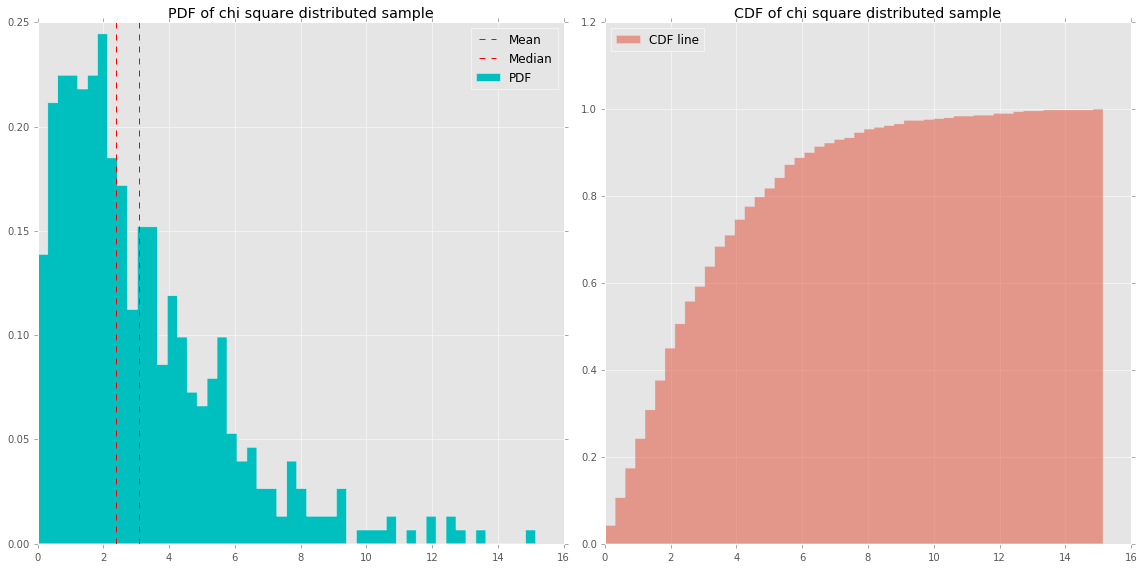

In [509]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 8))
ax0.hist(chi_distr, 50, normed=1, histtype='stepfilled', facecolor='c', label = 'PDF')
ax0.set_title('PDF of chi square distributed sample')
ax1.hist(chi_distr, bins=50, normed=1, histtype='stepfilled', cumulative=1, alpha = 0.5, label = 'CDF line')
ax1.set_title('CDF of chi square distributed sample')
chi_mean = st.mean(chi_distr)
chi_median = st.median(chi_distr)
ax0.axvline(chi_mean, color='g', linestyle='dashed', linewidth=1, label ='Mean') 
ax0.axvline(chi_median, color='r', linestyle='dashed', linewidth=1, label = 'Median') 
ax0.legend()
ax1.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

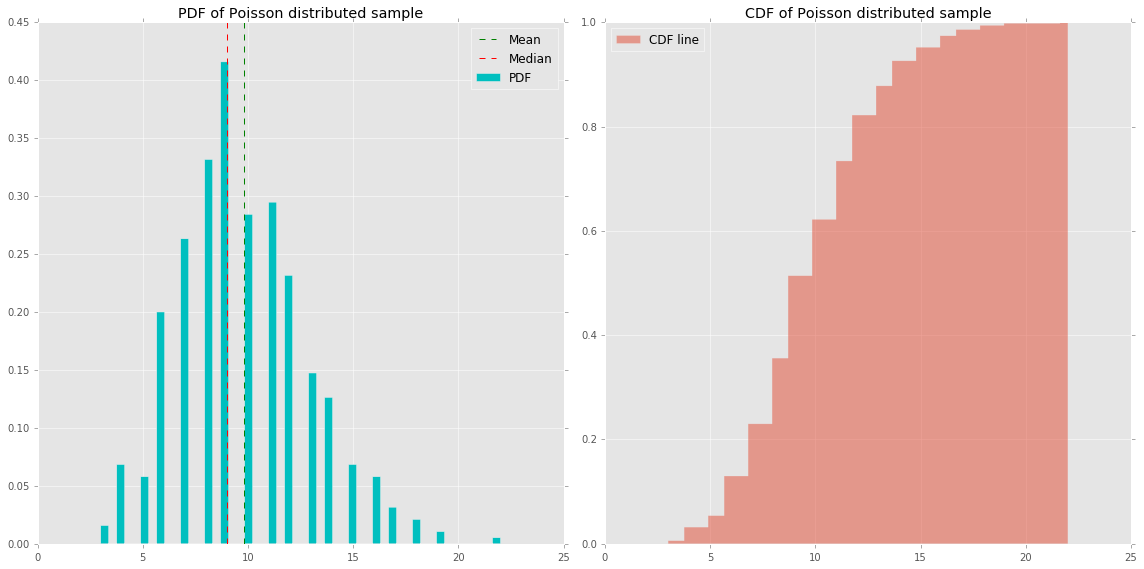

In [512]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 8))
ax0.hist(poiss_distr, 50, normed=1, histtype='stepfilled', facecolor='c', label = 'PDF')
ax0.set_title('PDF of Poisson distributed sample')
ax1.hist(poiss_distr, bins=50, normed=1, histtype='stepfilled', cumulative=1, alpha = 0.5,  label = 'CDF line')
ax1.set_title('CDF of Poisson distributed sample')
poiss_mean = st.mean(poiss_distr)
poiss_median = st.median(poiss_distr)
ax0.axvline(poiss_mean, color='g', linestyle='dashed', linewidth=1, label ='Mean') 
ax0.axvline(poiss_median, color='r', linestyle='dashed', linewidth=1, label = 'Median') 
ax0.legend()
ax1.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

Коэффициент Пирсона подходит для проверки данных на линейную зависимость, в то время как коэффициент Спирмена подходит для нелинейно зависящих данных, поскольку он не учитывает величину изменения.

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

In [513]:
beauty_df = pd.DataFrame.from_csv('../data/beauty.csv', sep = ';') 
beauty_df.reset_index(level=0, inplace=True) 
beauty_df.head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [514]:
beauty_corr = beauty_df.corr(method='spearman', min_periods=1)
beauty_corr

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.360861,0.206118,0.047938,-0.125665,-0.448844,0.217270,-0.126311,0.262666,0.038234
exper,0.360861,1.000000,0.093393,-0.121028,-0.011096,-0.250583,0.285990,-0.041593,-0.138599,-0.152729
union,0.206118,0.093393,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.117902,-0.051098
goodhlth,0.047938,-0.121028,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.093197,0.057166
black,-0.125665,-0.011096,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.111132,0.015194
female,-0.448844,-0.250583,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.008033,0.021438
married,0.217270,0.285990,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.061963,-0.066235
service,-0.126311,-0.041593,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.307787,0.016089
educ,0.262666,-0.138599,-0.117902,0.093197,-0.111132,0.008033,-0.061963,0.307787,1.000000,0.141147
looks,0.038234,-0.152729,-0.051098,0.057166,0.015194,0.021438,-0.066235,0.016089,0.141147,1.000000


Поскольку сравнить корреляцию нужно по модулю, то найдем топ 3 модулей корреляции, значение же легко посмотреть в таблице выше.

In [522]:
beauty_corr_abs = beauty_df.corr(method='spearman', min_periods=1).abs()
a = len(beauty_corr_abs) +3*2
l = beauty_corr_abs.stack().nlargest(a)
m = pd.DataFrame(l)
m.columns = ['module of correlation']
m = m.ix[10:]
m = m.drop(m.index[[1,3,5]])
m

module of correlation
wage   female                0.448844
       exper                 0.360861
female married               0.319228

Видно, что по этим данным корреляция между переменными относительно слабая (особенно, учитывая то, что использовали коэффициент Спирмена, то есть зависимость могла быть и не линейной). По топ-3 можно сказать, что:

1) Зарплата у женщин как правило меньше, чем у мужчин

2) Зарплата у людей с большим опытом работы как правило больше

3) Женщины реже женаты, чем мужчины. Можно предположить, что в популяции, представленной этой выборкой, женщин больше, то есть им не хватает мужчин для брака. Стоит отметить, что в самой выборке мужчин вполне может быть больше (для оптимального размещения выборки). 

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

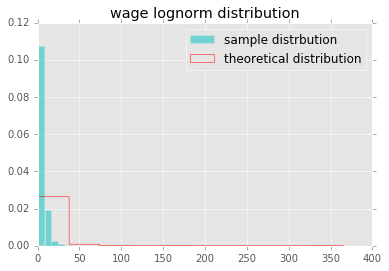

Shape parameter =  1.06620499036 ; loc =  1.0193875137 ; scale = 6.82466733376


In [463]:
a, b, c = stats.chi.fit(beauty_df['wage']) 
plt.hist(beauty_df['wage'], normed = True, bins = 10, facecolor='c', alpha = 0.5, label ='sample distrbution')
plt.title('wage lognorm distribution')
plt.hist(stats.lognorm.rvs(a, b, c, size=500), normed = True, histtype='step', color='r', label = 'theoretical distribution')
plt.legend()
plt.show() 
print('Shape parameter = ', a, '; loc = ', b,'; scale =', c)

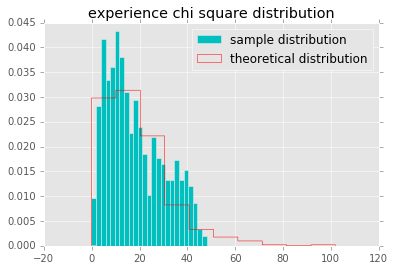

degree of freedom =  4.15415390907 ; loc = -0.494923820228 ; scale = 4.50182441419


In [465]:
k, b, c = stats.chi2.fit(beauty_df['exper']) 
plt.hist(beauty_df['exper'], normed = True, bins = 25, facecolor='c', label = 'sample distribution')
plt.title('experience chi square distribution')
plt.hist(stats.chi2.rvs(k, b, c, size=500), normed=True, histtype='step', color='r', label = 'theoretical distribution')
plt.legend()
plt.show() 
print('degree of freedom = ', k,'; loc =', b, '; scale =', c)

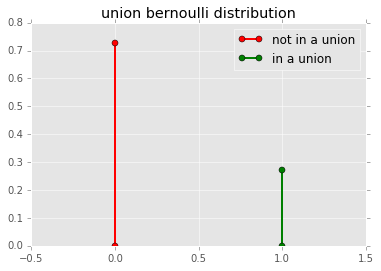

probability 0.2722222222222222


In [455]:
p = beauty_df['union'].sum()/len(beauty_df['union'])
q = 1- p
plt.plot((0, 0), (0, q), 'o-r', linewidth=2.0, label = 'not in a union')
plt.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'in a union')
plt.xlim(-0.5, 1.5)
plt.title('union bernoulli distribution')
plt.legend()
plt.show() 
print ('probability', p)

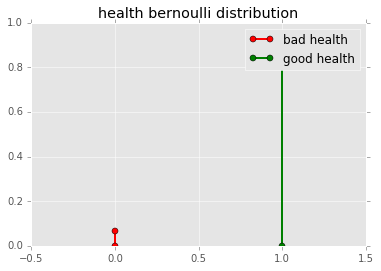

probability 0.9333333333333333


In [456]:
p = beauty_df['goodhlth'].sum()/len(beauty_df['goodhlth'])
q = 1- p
plt.plot((0, 0), (0, q), 'o-r', linewidth=2.0, label = 'bad health')
plt.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'good health')
plt.xlim(-0.5, 1.5)
plt.title('health bernoulli distribution')
plt.legend()
plt.show() 
print ('probability',p)

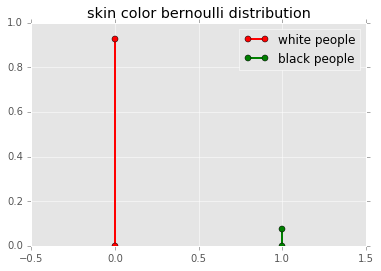

0.07380952380952381


In [403]:
p = beauty_df['black'].sum()/len(beauty_df['black'])
q = 1- p
plt.plot((0, 0), (0, q), 'o-r', linewidth=2.0, label = 'white people')
plt.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'black people')
plt.xlim(-0.5, 1.5)
plt.title('skin color bernoulli distribution')
plt.legend()
plt.show() 
print (p)

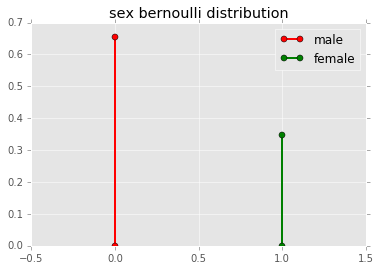

probability 0.346031746031746


In [457]:
p = beauty_df['female'].sum()/len(beauty_df['female'])
q = 1- p
plt.plot((0, 0), (0, q), 'o-r', linewidth=2.0, label = 'male')
plt.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'female')
plt.xlim(-0.5, 1.5)
plt.title('sex bernoulli distribution')
plt.legend()
plt.show() 
print ('probability',p)

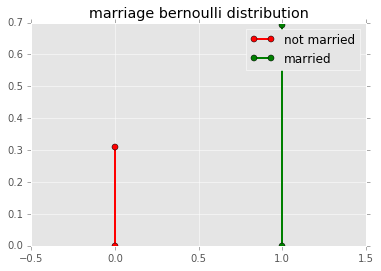

probability 0.6912698412698413


In [458]:
p = beauty_df['married'].sum()/len(beauty_df['married'])
q = 1- p
plt.plot((0, 0), (0, q), 'o-r', linewidth=2.0, label = 'not married')
plt.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'married')
plt.xlim(-0.5, 1.5)
plt.title('marriage bernoulli distribution')
plt.legend()
plt.show() 
print ('probability',p)

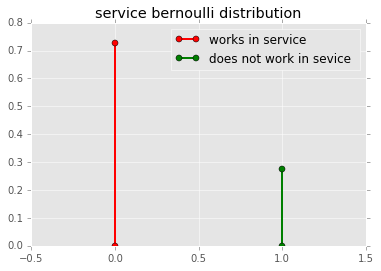

probability 0.27380952380952384


In [459]:
p = beauty_df['service'].sum()/len(beauty_df['service'])
q = 1- p
plt.plot((0, 0), (0, q), 'o-r', linewidth=2.0, label = 'works in service')
plt.plot((1, 1), (0, p), 'o-g', linewidth=2.0, label = 'does not work in sevice ')
plt.xlim(-0.5, 1.5)
plt.title('service bernoulli distribution')
plt.legend()
plt.show() 
print ('probability',p)

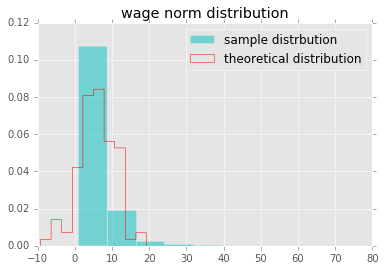

mean 6.30669047619 , standart deviation 4.65878921011


In [460]:
mean, sigma = stats.norm.fit(beauty_df['wage']) 
plt.hist(beauty_df['wage'], normed = True, bins = 10, facecolor='c', alpha = 0.5, label ='sample distrbution')
plt.title('wage norm distribution')
plt.hist(stats.norm.rvs(mean, sigma, size=100), normed = True, histtype='step', color='r', label = 'theoretical distribution')
plt.legend()
plt.show() 
print('mean',mean,', standart deviation',sigma)

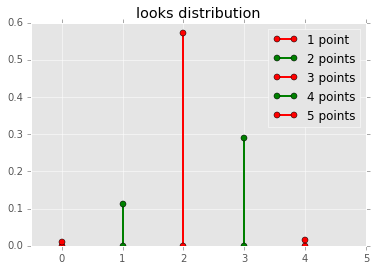

probability of 1 point = 0.0103174603175 ; probability of 2 points = 0.112698412698 ; probability of 3 points = 0.573015873016 ; probability of 4 points = 0.288888888889 ; probability of 5 points = 0.0150793650794


In [468]:
looks = beauty_df.groupby(['looks']).size()
p1 = looks.ix[1]/len(beauty_df['married'])
p2 = looks.ix[2]/len(beauty_df['married'])
p3 = looks.ix[3]/len(beauty_df['married'])
p4 = looks.ix[4]/len(beauty_df['married'])
p5 = looks.ix[5]/len(beauty_df['married'])
plt.xlim(-0.5, 5)
plt.plot((0, 0), (0, p1), 'o-r', linewidth=2.0, label = '1 point')
plt.plot((1, 1), (0, p2), 'o-g', linewidth=2.0, label = '2 points')
plt.plot((2, 2), (0, p3), 'o-r', linewidth=2.0, label = '3 points')
plt.plot((3, 3), (0, p4), 'o-g', linewidth=2.0, label = '4 points')
plt.plot((4, 4), (0, p5), 'o-r', linewidth=2.0, label = '5 points')
plt.title('looks distribution')
plt.legend()
plt.show() 
print ('probability of 1 point =', p1,'; probability of 2 points =', p2 ,'; probability of 3 points =',
       p3,'; probability of 4 points =', p4,'; probability of 5 points =', p5)

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [469]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [ ]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [549]:
newsgroups_all = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])
text_all = newsgroups_all.data 
text_train, text_test, y_train, y_test = train_test_split(newsgroups_all.data, newsgroups_all.target, test_size = 0.3)

In [550]:
text_all

['From: 9051467f@levels.unisa.edu.au (The Desert Brat)\nSubject: Re: Keith Schneider - Stealth Poster?\nOrganization: Cured, discharged\nLines: 24\n\nIn article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:\n\n> But really, are you threatened by the motto, or by the people that use it?\n\nEvery time somone writes something and says it is merely describing the norm,\nit is infact re-inforcing that norm upon those programmed not to think for\nthemselves. The motto is dangerous in itself, it tells the world that every\n*true* American is god-fearing, and puts down those who do not fear gods. It\ndoesn\'t need anyone to make it dangerous, it does a good job itself by just\nexisting on your currency.\n\n> keith\n\nThe Desert Brat\n-- \nJohn J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________\n9051467f@levels.unisa.edu.au      T.S.A.K.C.            \\/Darwin o\\\nFor replies, mail to whjjm@wh.whyalla.unisa.edu.au      /\\________/\nDisclaimer

**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [556]:
vectorizer_func = CountVectorizer(analyzer='word', stop_words='english', lowercase=True) 
vectorizer_func.fit(text_all) 
X_train = vectorizer_func.transform(text_train).toarray() 
X_test = vectorizer_func.transform(text_test).toarray() 
print('X_train \n', X_train) 
print('X_test \n',X_test)

X_train 
 [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
X_test 
 [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [559]:
topword_df = pd.DataFrame(np.sum(X_train, axis = 0))
topword_df[1] = pd.DataFrame(vectorizer_func.get_feature_names())
topword_df.columns = ['Popularity', 'Word']
topword_df.sort_values(by = 'Popularity', ascending = False).head(50)

,Popularity,Word
10375,2771,edu
23796,1429,space
24521,1367,subject
16206,1318,lines
18927,1236,organization
27835,1182,writes
7671,1159,com
4860,995,article
9995,832,don
12764,807,god


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [570]:
bayes1 = MultinomialNB(alpha=1.0).fit(X_train, y_train) 
predicted1 = bayes1.predict(X_test) 
est_acc1 = metrics.classification_report(y_test, predicted1, target_names = newsgroups_all.target_names)
print(est_acc1)

             precision    recall  f1-score   support

alt.atheism       0.99      0.98      0.99       234
  sci.space       0.99      0.99      0.99       302

avg / total       0.99      0.99      0.99       536



**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [571]:
bayes0 = MultinomialNB(alpha=0).fit(X_train, y_train) 
predicted0 = bayes0.predict(X_test) 
est_acc0 = metrics.classification_report(y_test, predicted0, target_names = newsgroups_all.target_names)
print(est_acc0)

             precision    recall  f1-score   support

alt.atheism       0.44      1.00      0.61       234
  sci.space       0.00      0.00      0.00       302

avg / total       0.19      0.44      0.27       536



/Users/vladislavgracev/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


По всей видимости, в связи с параметром сглаживания, равным 0, не получается посчитать точность оценки для данных во второй строке, поэтому им автоматически присваиваются нулевые значения